In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction to Machine Learning

Predicting customer churn

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Data Cleaning

## 1.1. Missing Values

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.replace("", np.nan).isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.replace(" ", np.nan).isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df[df["TotalCharges"].eq(" ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
len(df)

7043

11 rows with whitespace as 'TotalCharge'. We found at that those rows are missing, because these customers are in their first month and haven't gotten charged so far.
Options:
- drop
- impute (0, or monthly charge)

In [9]:
df.loc[df["TotalCharges"].eq(" "), "TotalCharges"] = 0

In [10]:
df.replace(" ", np.nan).isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

## 1.2. Casting types

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Cast binary categorical features to booleans (int)

In [15]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [16]:
categorical = ["Contract", "InternetService"]

In [17]:
[col for col in df.nunique()[df.nunique().eq(3)].index if col not in categorical]

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [18]:
df[[col for col in df.nunique()[df.nunique().eq(3)].index if col not in categorical]].apply(pd.value_counts)

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,3390.0,3498.0,3088.0,3095.0,3473.0,2810.0,2785.0
No internet service,NaN,1526.0,1526.0,1526.0,1526.0,1526.0,1526.0
No phone service,682.0,NaN,NaN,NaN,NaN,NaN,NaN
Yes,2971.0,2019.0,2429.0,2422.0,2044.0,2707.0,2732.0


In [19]:
to_bool = [col for col in df.nunique()[df.nunique().eq(3)].index if col not in categorical]

In [20]:
df[to_bool] = np.where(df[to_bool].eq("Yes"),1,0)

In [21]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
df["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

Convert gender to bool

In [23]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [24]:
df["gender"].eq("Female")

0        True
1       False
2       False
3       False
4        True
        ...  
7038    False
7039     True
7040     True
7041    False
7042    False
Name: gender, Length: 7043, dtype: bool

In [25]:
df = df.assign(female=df["gender"].eq("Female").astype(int))

In [26]:
df = df.drop(columns="gender")

Convert remaining boolean columns to int

In [27]:
df.dtypes

customerID           object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
female                int64
dtype: object

In [28]:
to_bool_as_well = ["Partner", "Dependents", "PhoneService", "Churn", "PaperlessBilling"]

In [29]:
df[to_bool_as_well].apply(pd.value_counts)

,Partner,Dependents,PhoneService,Churn,PaperlessBilling
No,3641,4933,682,5174,2872
Yes,3402,2110,6361,1869,4171


In [30]:
df[to_bool_as_well] = np.where(df[to_bool_as_well].eq("Yes"),1,0)

In [31]:
df

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,female
0,7590-VHVEG,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,0
2,3668-QPYBK,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,DSL,1,0,...,1,1,1,One year,1,Mailed check,84.80,1990.50,0,0
7039,2234-XADUH,0,1,1,72,1,1,Fiber optic,0,1,...,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,1
7040,4801-JZAZL,0,1,1,11,0,0,DSL,1,0,...,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,1
7041,8361-LTMKD,1,1,0,4,1,1,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,0


Take a look at tenure

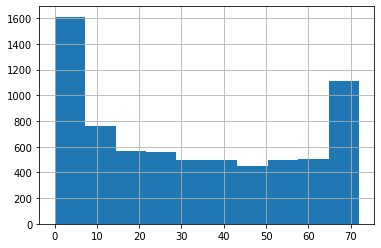

In [32]:
df["tenure"].hist();

In [33]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

Categorize features into
- categorical
- numerical
- boolean

In [34]:
df.nunique()

customerID          7043
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
female                 2
dtype: int64

In [35]:
target_col = ["Churn"]
id_col = ["customerID"]

cat_cols = categorical + ["PaymentMethod"]
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
bool_cols = [col for col in df.nunique()[df.nunique().eq(2)].index if col not in target_col]

## 2. Split dataset

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train, test = train_test_split(df, test_size=.1, random_state=3)

In [38]:
train.shape

(6338, 21)

In [39]:
test.shape

(705, 21)

# 3. Data Preprocessing

In [40]:
train.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,female
3362,3658-KIBGF,0,0,0,1,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Electronic check,54.90,54.90,1,1
6218,8821-KVZKQ,0,1,1,70,0,0,DSL,0,1,...,1,1,1,One year,1,Bank transfer (automatic),58.40,4113.15,0,1
6078,9691-HKOVS,0,1,0,55,1,1,DSL,1,1,...,1,1,1,One year,1,Electronic check,90.15,4916.95,0,1
6530,0230-UBYPQ,1,1,0,63,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),36.10,2298.90,0,0
1859,4143-HHPMK,0,0,0,52,1,0,Fiber optic,0,1,...,0,0,1,Month-to-month,1,Electronic check,85.35,4338.60,1,0


## 3.1. Standardize all numerical features

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
# standardize
std = StandardScaler()
scaled_fitted = std.fit(train[num_cols])

Visualize

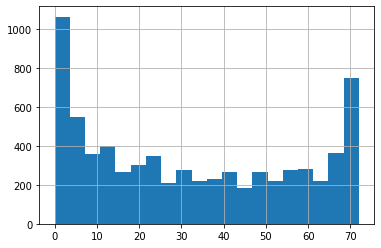

In [43]:
df["tenure"].hist(bins=20);

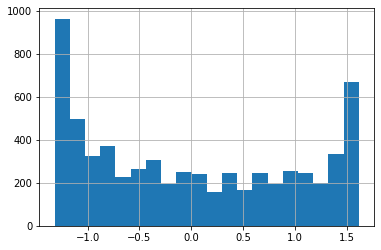

In [44]:
pd.DataFrame(scaled_fitted.transform(train[num_cols]), columns=num_cols)["tenure"].hist(bins=20);

In [45]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [46]:
scaled_num_cols = pd.DataFrame(scaled_fitted.transform(train[num_cols]), columns=["scaled_"+col for col in num_cols])

In [47]:
scaled_num_cols.head()

,scaled_tenure,scaled_MonthlyCharges,scaled_TotalCharges
0,-1.276951,-0.329338,-0.981301
1,1.531758,-0.212952,0.808758
2,0.921169,0.842832,1.163308
3,1.246816,-0.954495,0.008508
4,0.799051,0.683217,0.908202


In [48]:
train = train.merge(scaled_num_cols, left_index=True, right_index=True, how="inner")

## 3.2. Create dummy variables

In [49]:
cat_cols

['Contract', 'InternetService', 'PaymentMethod']

In [50]:
train = pd.get_dummies(data=train,
                       columns=cat_cols,
                       drop_first=True)

Create function to run test set through same preprocessing steps

In [51]:
def preprocess(df, trained_standardization_factors):
    scaled_cols = pd.DataFrame(trained_standardization_factors.transform(df[num_cols]), columns=["scaled_"+col for col in num_cols])
    df = df.merge(scaled_cols, left_index=True, right_index=True, how="inner")
    df = pd.get_dummies(data=df,
                        columns=cat_cols,
                        drop_first=True)
    
    return df

In [52]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,6338.0,1.640896e-01,0.370386,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,6338.0,4.798044e-01,0.499631,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,6338.0,2.970969e-01,0.457016,0.000000,0.000000,0.000000,1.000000,1.000000
tenure,6338.0,3.237015e+01,24.568389,0.000000,9.000000,29.000000,55.000000,72.000000
PhoneService,6338.0,9.035973e-01,0.295166,0.000000,1.000000,1.000000,1.000000,1.000000
MultipleLines,6338.0,4.215841e-01,0.493852,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineSecurity,6338.0,2.844746e-01,0.451199,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,6338.0,3.466393e-01,0.475937,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,6338.0,3.415904e-01,0.474280,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,6338.0,2.885768e-01,0.453136,0.000000,0.000000,0.000000,1.000000,1.000000


# 4. Feature Selection

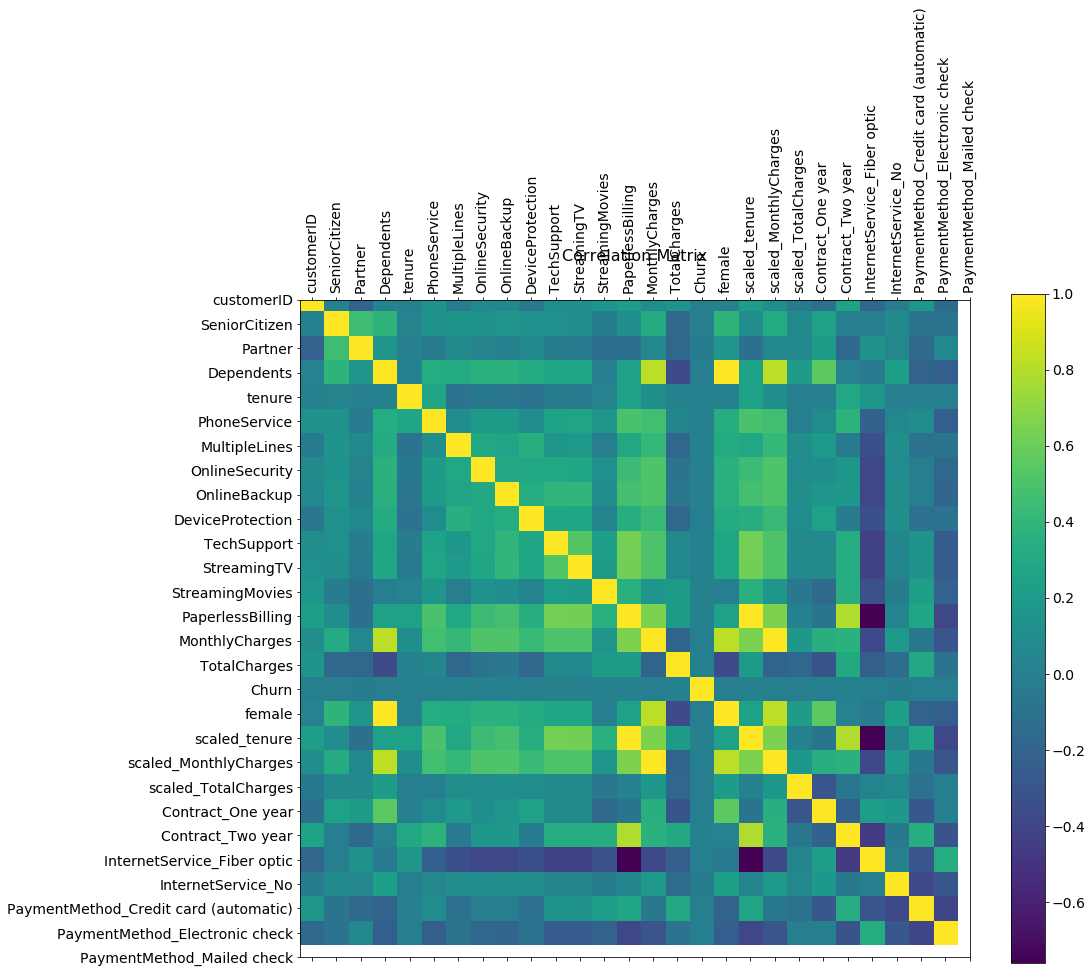

In [53]:
fig = plt.figure(figsize=(15,12))
plt.matshow(train.corr(), fignum=fig.number)
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=90)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14);
plt.title("Correlation Matrix", fontsize=16);

# 5. Train Model

In [54]:
test = preprocess(test, scaled_fitted)

In [55]:
test

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,scaled_tenure,scaled_MonthlyCharges,scaled_TotalCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,4289-DTDKW,0,1,0,40,1,1,0,1,0,...,0.310580,1.213603,0.808736,0,0,1,0,0,1,0
1,3195-TQDZX,0,0,0,3,1,0,0,0,0,...,-1.195539,-1.481555,-0.978412,0,0,0,1,0,1,0
2,1455-ESIQH,0,0,0,1,1,0,0,0,0,...,-1.276951,0.807916,-0.966216,0,0,1,0,0,1,0
3,0388-EOPEX,0,1,0,2,1,0,1,0,0,...,-1.236245,0.319096,-0.944029,0,0,1,0,0,1,0
4,4312-GVYNH,0,1,0,70,0,0,1,0,1,...,1.531758,-0.497266,0.481049,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,4816-JBHOV,1,0,0,2,1,0,0,0,0,...,-1.236245,-0.668519,-0.964187,0,0,0,0,0,1,0
701,6486-LHTMA,1,1,0,31,1,1,0,0,1,...,-0.055773,0.861121,0.245198,1,0,1,0,0,1,0
702,8642-GVWRF,0,1,0,2,1,0,0,1,1,...,-1.236245,0.495337,-0.932737,0,0,1,0,0,0,0
703,5318-YKDPV,0,1,1,43,1,0,1,0,1,...,0.432698,0.477048,0.567680,0,1,0,0,1,0,0


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# create X, y 
train_y = train[target_col]
train_X = train.drop(columns=id_col + target_col)

test_y = test[target_col]
test_X = test.drop(columns=id_col + target_col)


# train
lr = LogisticRegression()
lr.fit(train_X, train_y)

# predict
pred = lr.predict(test_X)

# accuracy_score
accuracy_score(test_y, pred)

/Users/at/miniconda3/envs/code_red/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/at/miniconda3/envs/code_red/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8042553191489362

In [59]:
test_y

,Churn
0,1
1,0
2,1
3,1
4,0
...,...
700,1
701,0
702,1
703,0


In [68]:
test_X.iloc[0:2]

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,scaled_tenure,scaled_MonthlyCharges,scaled_TotalCharges,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,40,1,1,0,1,0,0,...,0.310580,1.213603,0.808736,0,0,1,0,0,1,0
1,0,0,0,3,1,0,0,0,0,0,...,-1.195539,-1.481555,-0.978412,0,0,0,1,0,1,0


In [67]:
lr.predict(test_X.iloc[0:2])

array([1, 0])

In [69]:
test_y[0:2]

,Churn
0,1
1,0


In [60]:
pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [61]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)